# Exploratory Data Analysis

In [5]:
import os
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
sns.set_theme()

In [14]:
# IDs = ['001', '003', '004', '005', '115', '116', '117', '118', '120', '121',
#        '122', '123', '125', '126', '127', '128', '129', '130', '131', '132',
#        '133', '135', '138', '151', '152', '301', '303', '304', '305', '306',
#        '307', '308', '309']

meta_path = "C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-meta-data.xlsx"

save_path = "C:\\Users\\zacha\\Data\\AVI-DYS\\Results\\EDA"

# Visualize the participant demographic data

In [7]:
# Read in the meta data
df = pd.read_excel(meta_path)

c:\Users\zacha\anaconda3\envs\ml\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### Visualize Included/Excluded

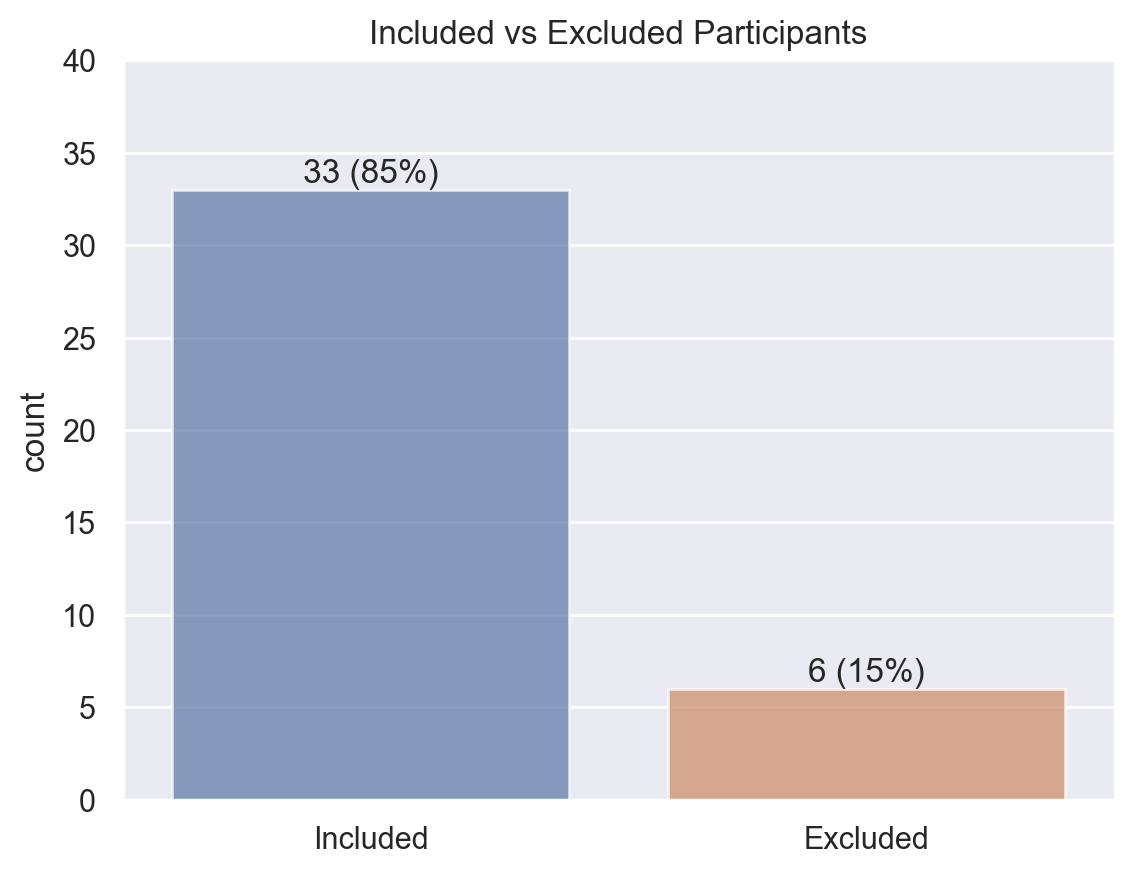

In [8]:
ax = sns.countplot(x=df['Excluded'],
                   order=df['Excluded'].value_counts(ascending=False).index,
                   alpha=.7);
abs_values = df['Excluded'].value_counts(ascending=False)
rel_values = df['Excluded'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_ylim((0,40))
ax.set_xticklabels(("Included","Excluded"))
ax.set_xlabel("")
ax.set(title='Included vs Excluded Participants')

png_path = os.path.join(save_path,"Included-vs-Excluded.png")
svg_path = os.path.join(save_path,"Included-vs-Excluded.svg")

plt.savefig(png_path, dpi=400, bbox_inches='tight')
plt.savefig(svg_path, bbox_inches='tight')

### Visualize Sex

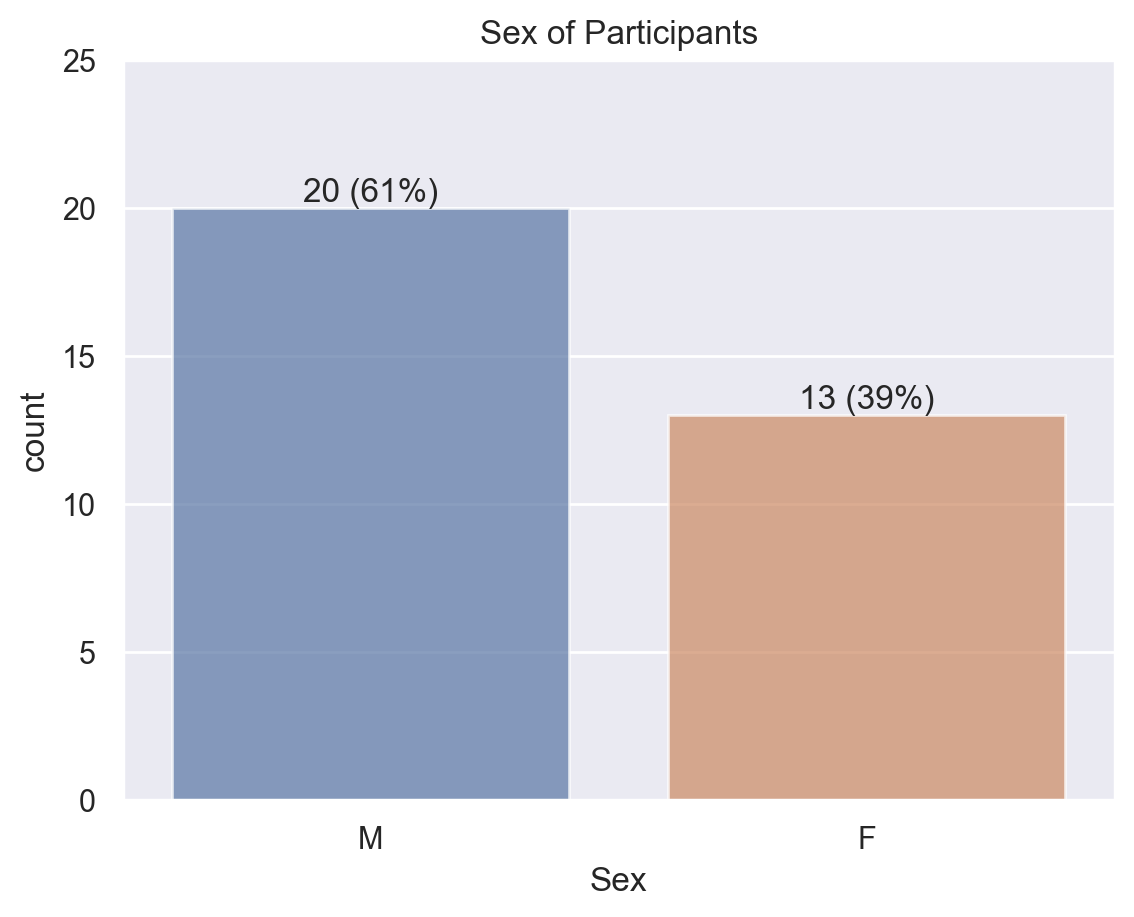

In [15]:
# Drop the excluded participants
df = df.drop(df[df.Excluded == 1].index)

ax = sns.countplot(x=df['Sex'],
                   order=df['Sex'].value_counts(ascending=False).index,
                   alpha=.7);
abs_values = df['Sex'].value_counts(ascending=False)
rel_values = df['Sex'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_ylim((0,25))
ax.set(title='Sex of Participants')

png_path = os.path.join(save_path,"Sex-of-Participants.png")
svg_path = os.path.join(save_path,"Sex-of-Participants.svg")

plt.savefig(png_path, dpi=400, bbox_inches='tight')
plt.savefig(svg_path, bbox_inches='tight')

### Visualize Age Distribution

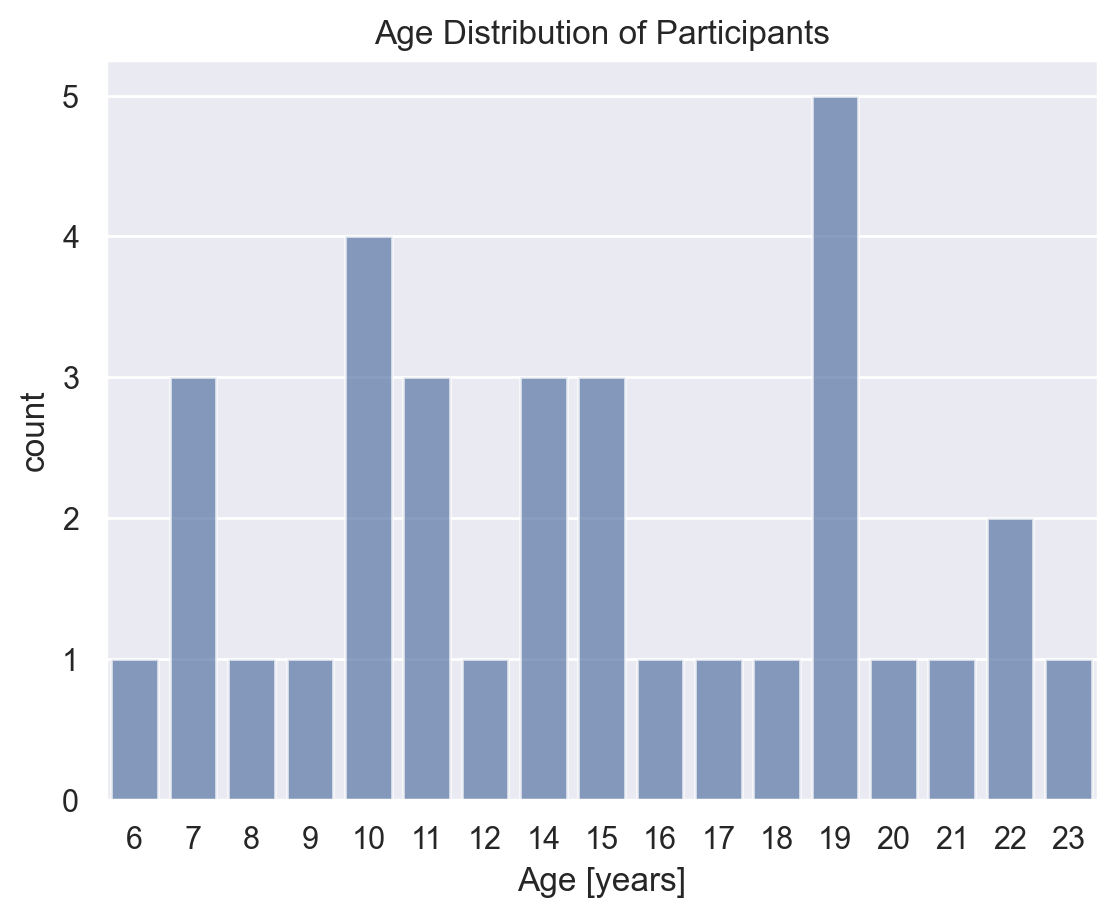

In [16]:
ax = sns.countplot(x=df['Age_year'],
                   color="b",
                   alpha=.7);
ax.set_xlabel("Age [years]")
ax.set(title='Age Distribution of Participants')

png_path = os.path.join(save_path,"Age-Distributions.png")
svg_path = os.path.join(save_path,"Age-Distributions.svg")

plt.savefig(png_path, dpi=400, bbox_inches='tight')
plt.savefig(svg_path, bbox_inches='tight')

# Visualize the Train-Test Splits